# Intro to Data Preprocessing
Data preprocessing can refer to manipulation or preparation of data for inputting into models

In [210]:
import numpy as np
import pandas as pd
import IPython.display as ipd
import matplotlib.pyplot as plt

np.random.seed(19)

# Data Exploration

Data set used here is the BigMart Sales Dataset
#Talk more abt it later

In [99]:
#Loading data
data = pd.read_csv("archive/store.csv") #try loading missing values
data.head()
#data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [11]:
data.shape #8523,12
data.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

## Indexing

In [13]:
data.head() #By default gives only 5 entries, Has a max limit of 50, accepts parameter upto 50
# data.tail()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [42]:
# data.columns
data.info() #Notice how Item_weight and Outlet_size have less values than total no of rows

#Maybe talk about data types like nominal ordinal etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [27]:
arr = np.random.randint(25, size=10) #create a list from 0 to29

ipd.display(arr)
ipd.display(arr[2:8])

#in pandas we use a method iloc -> index locate
ipd.display(data.iloc[2:8])

array([24, 14, 11, 20,  6, 21,  6, 15,  4,  3])

array([11, 20,  6, 21,  6, 15])

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


In [49]:
data[['Item_Type']].head(20)
# data.loc[3:10,"Item_Type"] # first arguement is index, second is column

,Item_Type
0,Dairy
1,Soft Drinks
2,Meat
3,Fruits and Vegetables
4,Household
5,Baking Goods
6,Snack Foods
7,Snack Foods
8,Frozen Foods
9,Frozen Foods


## Exploring Data

In [47]:
data["Item_Type"].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [72]:
data["Item_Type"].value_counts()
# ipd.display(data["Item_Type"].count())

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [142]:
data["Outlet_Size"].unique() 

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [46]:
data["Item_Fat_Content"].unique() #Multiple names for same low fat

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [101]:
data["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [106]:
dat_copy = data.copy() # Making a shallow copy
dat_copy["Item_Fat_Content"] = dat_copy["Item_Fat_Content"].str.lower()
ipd.display(dat_copy["Item_Fat_Content"].unique())


# dat_copy["Item_Fat_Content"] = dat_copy["Item_Fat_Content"].replace("lf","low fat")
dat_copy["Item_Fat_Content"] = dat_copy["Item_Fat_Content"].replace({"lf":"low fat", "reg": "regular"})
dat_copy["Item_Fat_Content"].unique()

# dat_copy["Item_Fat_Content"].value_counts()

array(['low fat', 'regular', 'lf', 'reg'], dtype=object)

array(['low fat', 'regular'], dtype=object)

In [109]:
data = dat_copy
data.head(15)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,low fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


## Missing Values


**How to deal with missing data?**

1.  drop data  
    a. drop the whole row  
    b. drop the whole column
2.  replace data  
    a. replace it by mean  
    b. replace it by frequency  
    c. replace it based on other functions

In [141]:
missing_vals = data.isnull().sum()
ipd.display(missing_vals)
ipd.display(data.isnull().any())

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [174]:
# diguring out amt of missing values
outlet_missing = missing_vals['Outlet_Size']

# percent of data that is missing
percent_missing = (outlet_missing/total_cells) * 100
ipd.display("Outlets Missing: "+str(percent_missing))

weight_missing = missing_vals['Item_Weight']

# percent of data that is missing
percent_missing = (weight_missing/total_cells) * 100
ipd.display("Items missing " + str(percent_missing))

'Outlets Missing: 28.27642848762173'

'Items missing 17.165317376510618'

In [139]:
data[data["Item_Weight"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,low fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,low fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,low fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,low fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,low fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,low fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [163]:
# Replace Outlet by mode
# Replace Item_weight by mean

avg_item_wt = data["Item_Weight"].astype("float").mean()

data_cpy = data.copy()
data_cpy["Item_Weight"].replace(np.nan, avg_item_wt, inplace=True)
data_cpy["Item_Weight"].isnull().any() 
#Maybe assert

False

In [164]:
data = data_cpy

In [192]:
data_cpy = data.copy()

ipd.display(data_cpy["Outlet_Size"].value_counts())
outlet_mode = data_cpy["Outlet_Size"].mode()
data_cpy["Outlet_Size"].replace(np.nan, outlet_mode[0], inplace=True)

# data_cpy["Outlet_Size"].isnull().any()
data_cpy["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [202]:
data = data_cpy
ipd.display(data.isnull().any())

Item_Identifier              False
Item_Weight                  False
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                  False
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [203]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,low fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,low fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,low fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Outliers

In [64]:
# data.mean()
data.median()

Item_Weight                    12.600000
Item_Visibility                 0.053931
Item_MRP                      143.012800
Outlet_Establishment_Year    1999.000000
Item_Outlet_Sales            1794.331000
dtype: float64

In [65]:
data.describe() # Prob do later when doing quartiles

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:>

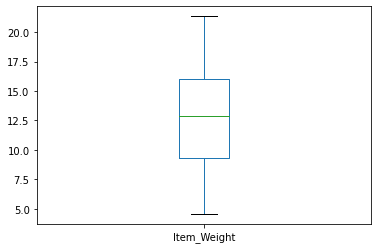

In [221]:
data["Item_Weight"].plot.box()

{'whiskers': [<matplotlib.lines.Line2D at 0x15496d38250>,
 'caps': [<matplotlib.lines.Line2D at 0x15496d38910>,
 'boxes': [<matplotlib.lines.Line2D at 0x15496d2aeb0>],
 'medians': [<matplotlib.lines.Line2D at 0x15496d38fd0>],
 'fliers': [<matplotlib.lines.Line2D at 0x15496d45370>],
 'means': []}

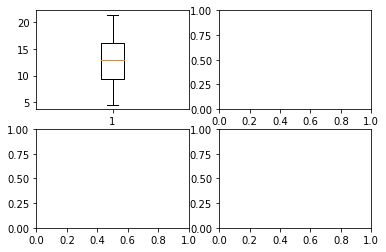

In [214]:
c = 0
fig, axs = plt.subplots(2, 2)
axs[0,0].boxplot(data['Item_Weight'])
# data.apply(lambda x: x.plot

In [223]:
## TO DO
    # * Make box plots and explain


outliers: the value that is considerably higher or lower from rest of the data

-   Lets say value at 75% is Q3 and value at 25% is Q1.
-   Outlier are smaller than Q1 - 1.5(Q3-Q1) and bigger than Q3 + 1.5(Q3-Q1). (Q3-Q1) = IQR  
    We will use describe() method. Describe method includes:
-   count: number of entries
-   mean: average of entries
-   std: standart deviation
-   min: minimum entry
-   25%: first quantile
-   50%: median or second quantile
-   75%: third quantile
-   max: maximum entry

  
What is quantile?

-   1,4,5,6,8,9,11,12,13,14,15,16,17
-   The median is the number that is in  **middle**  of the sequence. In this case it would be 11.
    
-   The lower quartile is the median in between the smallest number and the median i.e. in between 1 and 11, which is 6.
    
-   The upper quartile, you find the median between the median and the largest number i.e. between 11 and 17, which will be 14 according to the question above.